# Multi-Band Analysis

Decompose an EGG signal across the three gastric frequency bands
(bradygastria, normogastria, tachygastria) using `multiband_analysis`.
Each band gets its own narrowband filter, phase extraction, and metrics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
egg = gp.load_egg()
best_idx, _, _, _ = gp.select_best_channel(egg["signal"], egg["sfreq"])
best_signal = egg["signal"][best_idx]
sfreq = egg["sfreq"]
times = np.arange(len(best_signal)) / sfreq

## Run Multi-Band Analysis

In [3]:
results = gp.multiband_analysis(best_signal, sfreq)

print(f"{'Band':<12} {'Peak (Hz)':<11} {'Peak (cpm)':<12} {'N cycles':<10} "
      f"{'IC':<10} {'Power %':<10}")
print("-" * 65)
for name, res in results.items():
    print(f"{name:<12} {res['peak_freq_hz']:<11.4f} {res['peak_freq_hz']*60:<12.2f} "
          f"{res['cycle_stats']['n_cycles']:<10} "
          f"{res['instability_coefficient']:<10.4f} {res['prop_power']:<10.1%}")

Band         Peak (Hz)   Peak (cpm)   N cycles   IC         Power %   
-----------------------------------------------------------------
brady        0.0300      1.80         10         1.0639     7.3%      
normo        0.0530      3.18         38         0.1470     76.0%     
tachy        0.0960      5.76         72         0.2275     6.9%      


## Per-Band Filtered Signals

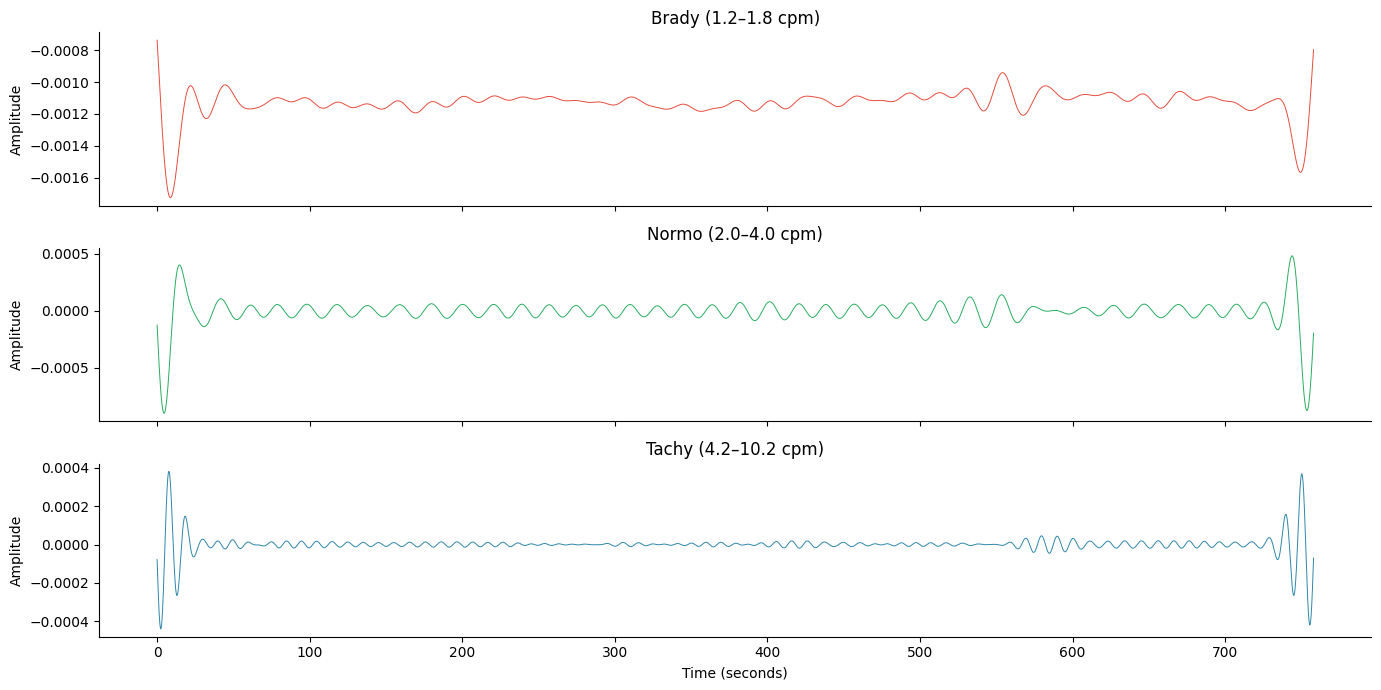

In [4]:
colors = {"brady": "#E74C3C", "normo": "#27AE60", "tachy": "#2E86AB"}

fig, axes = plt.subplots(3, 1, figsize=(14, 7), sharex=True)
for ax, (name, res) in zip(axes, results.items()):
    filt = res["filtered"]
    if not np.all(np.isnan(filt)):
        ax.plot(times, filt, lw=0.7, color=colors[name])
    band = res["band"]
    ax.set_title(f"{name.capitalize()} ({band['f_lo']*60:.1f}–{band['f_hi']*60:.1f} cpm)")
    ax.set_ylabel("Amplitude")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
axes[-1].set_xlabel("Time (seconds)")
fig.tight_layout()
plt.show()

## Power Distribution Across Bands

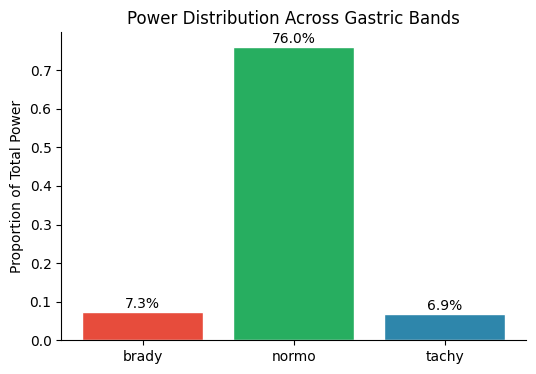

In [5]:
names = list(results.keys())
powers = [results[n]["prop_power"] for n in names]

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(names, powers, color=[colors[n] for n in names], edgecolor="white")
ax.set_ylabel("Proportion of Total Power")
ax.set_title("Power Distribution Across Gastric Bands")
for bar, p in zip(bars, powers):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{p:.1%}", ha="center", fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

**See also:** [PSD Visualization](plot_psd.ipynb),
[egg_process](egg_process.ipynb)